# Import python packages

In [1]:
import os
SRC_PATH = '../src/'
os.chdir(SRC_PATH)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

SEED = 7
np.random.seed(SEED)

# Define parameters and load dataset

In [3]:
LABELS = 'combined' # choose between 'vf and 'combined'
DATA_TYPE = 'lats_longs' # choose between 'lats_longs' and 'countries'

LOAD_TRAINING = False

In [4]:
MODEL_NAME = DATA_TYPE + '_' + LABELS + '_classification_evaluation_comparison'

ipsource_dict = {1: 'M', 2: 'R', 3: 'A', 4: 'X', 0: "pad"}
SOURCES_NUM = len(ipsource_dict) + 1
label_dict = {0: 'G', 1: 'R',2: 'Unknown'}
class_names = ["GREEN", "RED"]

DATA_PATH = '../data/'
MODELS_PATH = '../models/'
RESULTS_PATH = '../results/'

path_prefix = RESULTS_PATH + MODEL_NAME

if LOAD_TRAINING:
    training = pd.read_pickle("../data/dataset_b_noisy_7_agents_training.pkl") 
    print(len(training))
test_comb = pd.read_pickle("../data/dataset_b_noisy_7_agents_test.pkl") 
print(len(test_comb))

702383


In [5]:
test_comb.head()

,srcAS,destAS,srcCC,destCC,num_hops,lat,long,IPsource,geoCC,ASN,vf,combined,geo,owner
trid,,,,,,,,,,,,,,
4319757,8551,6147,IL,PE,12,"[32.080878999999996, 32.080878999999996, 50.11...","[34.780571, 34.780571, 8.68417, 8.67185, 8.671...","[2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3]","[IL, IL, DE, DE, DE, GB, GB, US, US, ES, ES, PE]","[8551, 8551, 8551, 8551, 3257, 3257, 3257, 129...",0,0,0,0
3971404,8551,9121,IL,TR,13,"[32.080878999999996, 32.080878999999996, 32.08...","[34.780571, 34.780571, 34.780571, -0.125740000...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[IL, IL, IL, GB, GB, GB, GB, GB, NL, NL, NL, N...","[8551, 8551, 8551, 8551, 3257, 3257, 2914, 291...",0,0,0,0
4094951,8551,9583,IL,IN,8,"[32.080878999999996, 32.080878999999996, 32.08...","[34.780571, 34.780571, 34.780571, -0.125740000...","[2, 2, 2, 1, 4, 4, 4, 4]","[IL, IL, IL, GB, nan, nan, nan, nan]","[8551, 8551, 8551, 9583, 0, 0, 0, 0]",0,0,0,0
1619804,20473,393396,US,US,8,"[48.860001000000004, 48.860001000000004, 48.86...","[2.34444, 2.34444, 2.34444, 10.7487, 2.34444, ...","[1, 1, 1, 3, 1, 1, 1, 3]","[FR, FR, FR, NO, FR, FR, US, US]","[1299, 1299, 1299, 3356, 3356, 3356, 3549, 393...",0,0,0,0
1353363,14061,29465,US,NG,10,"[50.115520000000004, 50.115520000000004, 50.11...","[8.68417, 8.68417, 8.67185, 8.67185, 2.34444, ...","[2, 1, 1, 1, 1, 1, 1, 1, 3, 3]","[DE, DE, DE, DE, FR, GB, GB, GB, NG, NG]","[14061, 14061, 1299, 1299, 1299, 1299, 1299, 1...",0,0,0,0


In [6]:
if LOAD_TRAINING:
    print(training[LABELS].value_counts())
    print(training[LABELS].value_counts(normalize=True))

In [7]:
print(test_comb[LABELS].value_counts())
print(test_comb[LABELS].value_counts(normalize=True))

0    668035
1     34348
Name: combined, dtype: int64
0    0.951098
1    0.048902
Name: combined, dtype: float64


In [8]:
max_len = max(len(raw) for raw in test_comb['lat'].values)
max_len = max(max_len, 40)
print(max_len)

40


## Process data

In [9]:
from data_utils import *

if LOAD_TRAINING:
    training = generate_dataset_and_meta(training, data_type=DATA_TYPE, max_len=max_len)
    print(len(training))

test_comb = generate_dataset_and_meta(test_comb, data_type=DATA_TYPE, max_len=max_len)
print(len(test_comb))

Using TensorFlow backend.
C:\Users\tals\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\tals\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\tals\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\tals\AppData\Roaming

702383


In [10]:
test_comb.head()

,srcAS,destAS,srcCC,destCC,num_hops,geoCC,ASN,vf,combined,geo,owner,sources,lats_longs
trid,,,,,,,,,,,,,
4319757,8551,6147,IL,PE,12,"[IL, IL, DE, DE, DE, GB, GB, US, US, ES, ES, PE]","[8551, 8551, 8551, 8551, 3257, 3257, 3257, 129...",0,0,0,0,"[2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 0, 0, ...","[[0.3564542233943939, 0.19322539865970612], [0..."
3971404,8551,9121,IL,TR,13,"[IL, IL, IL, GB, GB, GB, GB, GB, NL, NL, NL, N...","[8551, 8551, 8551, 8551, 3257, 3257, 2914, 291...",0,0,0,0,"[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, ...","[[0.3564542233943939, 0.19322539865970612], [0..."
4094951,8551,9583,IL,IN,8,"[IL, IL, IL, GB, nan, nan, nan, nan]","[8551, 8551, 8551, 9583, 0, 0, 0, 0]",0,0,0,0,"[2, 2, 2, 1, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, ...","[[0.3564542233943939, 0.19322539865970612], [0..."
1619804,20473,393396,US,US,8,"[FR, FR, FR, NO, FR, FR, US, US]","[1299, 1299, 1299, 3356, 3356, 3356, 3549, 393...",0,0,0,0,"[1, 1, 1, 3, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, ...","[[0.542888879776001, 0.013024666346609592], [0..."
1353363,14061,29465,US,NG,10,"[DE, DE, DE, DE, FR, GB, GB, GB, NG, NG]","[14061, 14061, 1299, 1299, 1299, 1299, 1299, 1...",0,0,0,0,"[2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 0, 0, 0, 0, ...","[[0.556839108467102, 0.0482453890144825], [0.5..."


# Map Countries & Define Embedding Parameters

In [11]:
import pickle
import os.path

if DATA_TYPE == "countries":
    country_idx = pickle.load(open(DATA_PATH + 'country_idx.pkl', 'rb'))
    total_countries = len(country_idx)
    print(total_countries)
    embedding_vecor_length = 32
else:
    total_countries = None
    country_idx = None
    embedding_vecor_length = 32

# Generate training and test sets

In [12]:
if DATA_TYPE == "lats_longs":
    input_shape = np.array(test_comb["lats_longs"].values[0]).shape
else:
    input_shape = np.array(test_comb["countries"].values[0]).shape
print(input_shape)

(40, 2)


## Create np arrays

### Remove UNDECIDED by chosen label

In [13]:
print(len(test_comb))

test = test_comb[test_comb[LABELS] < 2]
print(len(test))

if LOAD_TRAINING:
    training = training[training[LABELS] < 2]
    print(len(training))

702383
702383


### Generate np arrays for test_comb (evaluation on the 'label_comb'), training and test sets

In [14]:
x_test_comb, u_test_comb, y_test_comb = generate_set_arrays(test_comb, max_len, DATA_TYPE, 'combined', country_idx)
print(x_test_comb.shape, u_test_comb.shape, y_test_comb.shape)

(702383, 40, 2) (702383, 40) (702383,)


In [15]:
if LOAD_TRAINING:
    x_training, u_training, y_training = generate_set_arrays(training, max_len, DATA_TYPE, LABELS, country_idx)
    print(x_training.shape, u_training.shape, y_training.shape)

In [16]:
x_test, u_test, y_test = generate_set_arrays(test, max_len, DATA_TYPE, LABELS, country_idx)
print(x_test.shape, u_test.shape, y_test.shape)

(702383, 40, 2) (702383, 40) (702383,)


In [17]:
print(np.unique(u_test))

[0 1 2 3 4]


# Load models

In [18]:
from attention_models import generate_model

# def load_model(attention_name):
#     model_name = DATA_TYPE + '_' + LABELS + '_classification_' + attention_name + '_SimpleNet'
#     with open(MODELS_PATH + model_name + '.json', 'r') as f:
#         loaded_model =  model_from_json(f.read())
#     loaded_model.load_weights(MODELS_PATH + model_name + '_acc.hdf5')
#     print("Successfully loaded", attention_name, "model from disk")
#     return loaded_model

def load_model(ATTENTION_NAME):
    if ATTENTION_NAME == "SDPA":
        USE_SOURCES = False
    else:
        USE_SOURCES = True
        
    model = generate_model(input_shape, ATTENTION_NAME, USE_SOURCES, USE_EMBEDDING, num_categories=total_countries,
                       embedding_vecor_length=embedding_vecor_length, attention_first=ATTENTION_FIRST,
                       blstm=BLSTM, no_lstm=NO_LSTM)
    model_name = DATA_TYPE + '_' + LABELS + '_classification_' + ATTENTION_NAME + '_SimpleNet'
    model.load_weights(MODELS_PATH + model_name + '_acc.hdf5')
    print("Successfully loaded", ATTENTION_NAME, "model from disk")
    return model


if DATA_TYPE == "lats_longs":
    USE_EMBEDDING = False
else:
    USE_EMBEDDING = True

ATTENTION_FIRST = True
BLSTM = True
NO_LSTM = False

model_sdpa = load_model('SDPA')
model_sasa = load_model('SASA')
model_sdpa_qs_ks = load_model('SDPA_QS_KS')

Instructions for updating:
Colocations handled automatically by placer.
Successfully loaded SDPA model from disk
Successfully loaded SASA model from disk
Successfully loaded SDPA_QS_KS model from disk


# Evaluation

## Evaluate accuracy over the test set

In [19]:
from model_utils import *
val_batch_size = 1024

y_test_prediction_sdpa, y_test_prob_sdpa = get_model_pred_prob(model_sdpa, x_test, u_test, val_batch_size, False)
print(len(y_test_prediction_sdpa), len(y_test))

y_test_prediction_sasa, y_test_prob_sasa = get_model_pred_prob(model_sasa, x_test, u_test, val_batch_size, True)
print(len(y_test_prediction_sasa), len(y_test))

y_test_prediction_sdpa_qs_ks, y_test_prob_sdpa_qs_ks = get_model_pred_prob(model_sdpa_qs_ks, x_test, u_test, val_batch_size, True)
print(len(y_test_prediction_sdpa_qs_ks), len(y_test))

702383/702383 [==============================] - 252s 359us/step
702383 702383
702383/702383 [==============================] - 260s 370us/step
702383 702383
702383/702383 [==============================] - 244s 347us/step
702383 702383


In [20]:
from evaluation_utils import print_evaluation_metrics, plot_roc_curve_multiple

ATTENTION_NAME = "SDPA"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test, y_test_prediction_sdpa, y_test_prob_sdpa, ATTENTION_NAME)

ATTENTION_NAME = "SASA"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test, y_test_prediction_sasa, y_test_prob_sasa, ATTENTION_NAME)

ATTENTION_NAME = "SDPA_QS_KS"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test, y_test_prediction_sdpa_qs_ks, y_test_prob_sdpa_qs_ks, ATTENTION_NAME)

### Evaluation metrics for SDPA : ###
accuracy_score for SDPA 0.8728457266192376
FA for SDPA 0.12331539515145162
Detection rate i.e. recall_score for SDPA 0.7981833003377198
AUC for SDPA 0.9164213038333322
TPR@FPR=0.001 for SDPA (0.0009984506799793425, 0.17610923488994992)
TPR@FPR=0.01 for SDPA (0.009996482220242952, 0.48410387795504833)
TPR@FPR=0.1 for SDPA (0.09999925153622191, 0.7691277512518924)
### Evaluation metrics for SASA : ###
accuracy_score for SASA 0.8911434359886273
FA for SASA 0.10621748860463898
Detection rate i.e. recall_score for SASA 0.8398160009316409
AUC for SASA 0.9395834115634294
TPR@FPR=0.001 for SASA (0.0009984506799793425, 0.22758239198788868)
TPR@FPR=0.01 for SASA (0.009999476075355333, 0.5706300221264703)
TPR@FPR=0.1 for SASA (0.09999775460866571, 0.83268312565506)
### Evaluation metrics for SDPA_QS_KS : ###
accuracy_score for SDPA_QS_KS 0.8536439520888176
The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will

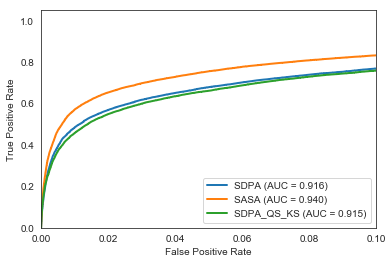

In [21]:
plot_roc_curve_multiple(y_test, [y_test_prob_sdpa, y_test_prob_sasa, y_test_prob_sdpa_qs_ks], path_prefix,
                        ["SDPA", "SASA", "SDPA_QS_KS"], max_fp=0.1)

### Over test_comb - based on 'combined' labels

In [22]:
y_test_comb_prediction_sdpa, y_test_comb_prob_sdpa = get_model_pred_prob(model_sdpa, x_test_comb, u_test_comb, val_batch_size, False)
print(len(y_test_comb_prediction_sdpa), len(y_test_comb))

y_test_comb_prediction_sasa, y_test_comb_prob_sasa = get_model_pred_prob(model_sasa, x_test_comb, u_test_comb, val_batch_size, True)
print(len(y_test_comb_prediction_sasa), len(y_test_comb))

y_test_comb_prediction_sdpa_qs_ks, y_test_comb_prob_sdpa_qs_ks = get_model_pred_prob(model_sdpa_qs_ks, x_test_comb, u_test_comb, val_batch_size, True)
print(len(y_test_comb_prediction_sdpa_qs_ks), len(y_test_comb))

702383/702383 [==============================] - 239s 340us/step
702383 702383
702383/702383 [==============================] - 252s 358us/step
702383 702383
702383/702383 [==============================] - 246s 350us/step
702383 702383


In [23]:
ATTENTION_NAME = "SDPA"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test_comb, y_test_comb_prediction_sdpa, y_test_comb_prob_sdpa, ATTENTION_NAME)

ATTENTION_NAME = "SASA"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test_comb, y_test_comb_prediction_sasa, y_test_comb_prob_sasa, ATTENTION_NAME)

ATTENTION_NAME = "SDPA_QS_KS"
print("### Evaluation metrics for", ATTENTION_NAME, ": ###")
print_evaluation_metrics(y_test_comb, y_test_comb_prediction_sdpa_qs_ks, y_test_comb_prob_sdpa_qs_ks, ATTENTION_NAME)

### Evaluation metrics for SDPA : ###
accuracy_score for SDPA 0.8728457266192376
FA for SDPA 0.12331539515145162
Detection rate i.e. recall_score for SDPA 0.7981833003377198
AUC for SDPA 0.9164213038333322
TPR@FPR=0.001 for SDPA (0.0009984506799793425, 0.17610923488994992)
TPR@FPR=0.01 for SDPA (0.009996482220242952, 0.48410387795504833)
TPR@FPR=0.1 for SDPA (0.09999925153622191, 0.7691277512518924)
### Evaluation metrics for SASA : ###
accuracy_score for SASA 0.8911434359886273
FA for SASA 0.10621748860463898
Detection rate i.e. recall_score for SASA 0.8398160009316409
AUC for SASA 0.9395834115634294
TPR@FPR=0.001 for SASA (0.0009984506799793425, 0.22758239198788868)
TPR@FPR=0.01 for SASA (0.009999476075355333, 0.5706300221264703)
TPR@FPR=0.1 for SASA (0.09999775460866571, 0.83268312565506)
### Evaluation metrics for SDPA_QS_KS : ###
accuracy_score for SDPA_QS_KS 0.8536439520888176
FA for SDPA_QS_KS 0.14410771890694352
Detection rate i.e. recall_score for SDPA_QS_KS 0.8099161523232794

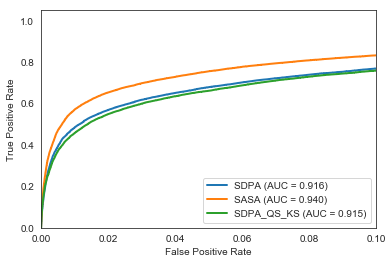

In [24]:
plot_roc_curve_multiple(y_test_comb, [y_test_comb_prob_sdpa, y_test_comb_prob_sasa, y_test_comb_prob_sdpa_qs_ks], path_prefix + '_comb',
                        ["SDPA", "SASA", "SDPA_QS_KS"], max_fp=0.1)